## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 12 : REINFORCEMENT LEARNING </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Start: 		2023-11-23 13:53:05.212872
Device ID: 	f3d399d9-89cc-11ee-8ec1-2c3b70a37f3c



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset1]
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing numpy library

In [1]:
import sys

In [2]:
pip install setuptools==65.5.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install gym==0.20.0

In [4]:
pip install gym-gridworlds

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [6]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [7]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [8]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
env = WindyGridworldEnv()

In [10]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions,
                                      dtype = float) * epsilon / num_actions
        
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return  Action_probabilities
    
    return policyFunction

In [11]:
def qLearning(env, num_episodes, discount_factor = 1.0,
             alpha = 0.6, epsilon = 0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))
    
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
    
    for ith_episode in range(num_episodes):
        state = env.reset()
        
        for t in itertools.count():
            action_probabilities = policy(state)
            
            action = np.random.choice(np.arange(
                len(action_probabilities)),
                p =action_probabilities)
            
            next_state, reward, done, _ = env.step(action)
            
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            if done:
                break
                
            state = next_state
            
        return Q, stats

In [12]:
Q, stats = qLearning(env, 1000)

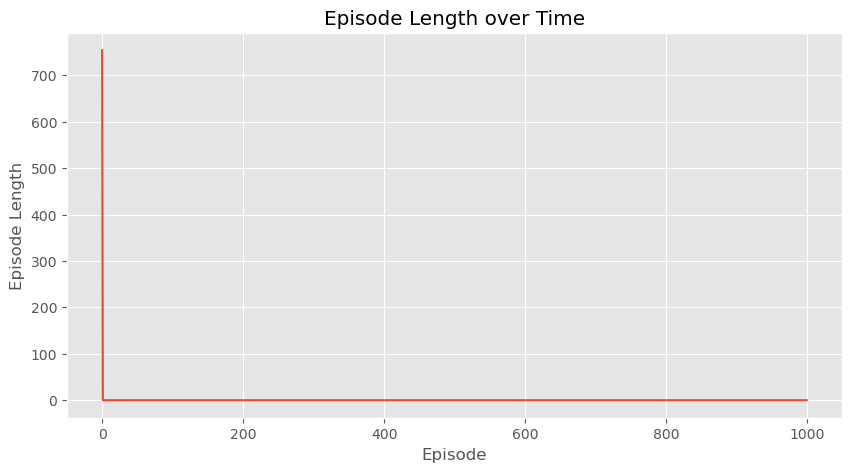

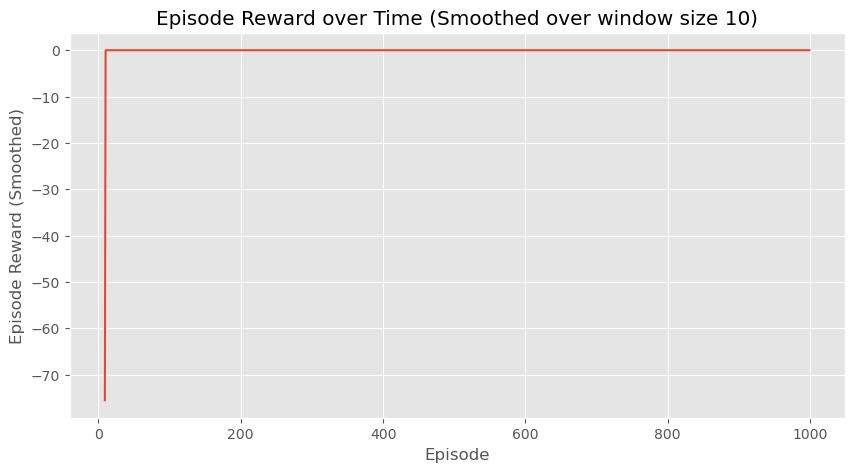

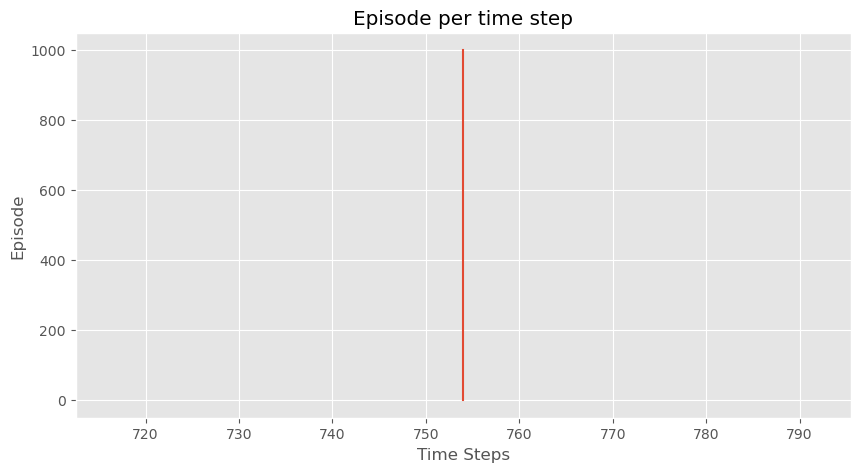

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [13]:
plotting.plot_episode_stats(stats)

In [14]:
import numpy as np
import pylab as pl
import networkx as nx

In [15]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
        (0, 9), (7, 8), (1, 7), (3, 9)]

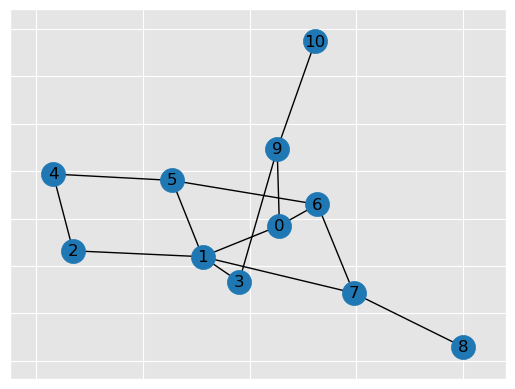

In [16]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

In [17]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
        
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0
        
M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(0, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.   0.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [18]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75

initial_state = 1

In [19]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

In [20]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action


action = sample_next_action(available_actions)

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3596235199.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))


In [21]:
def update(current_state, action, gamma):
    MAX_INDEX = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if MAX_INDEX.shape[0] > 1:
        max_index = int(np.random.choice(MAX_INDEX, size=1))
    else:
        max_index = int(MAX_INDEX)
    
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    
    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)
    else:
        return 0

In [22]:
update(initial_state, action, gamma)

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\2002583302.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(MAX_INDEX, size=1))


0

In [23]:
scores = []

for i in range(1000):
    
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3596235199.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
C:\Users\hp\AppData\Local\Temp\ipykernel_7044\2002583302.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(MAX_INDEX, size=1))
C:\Users\hp\AppData\Local\Temp\ipykernel_7044\2002583302.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(MAX_INDEX)


Most efficient path: 
[0, 9, 10]


C:\Users\hp\AppData\Local\Temp\ipykernel_7044\421969306.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


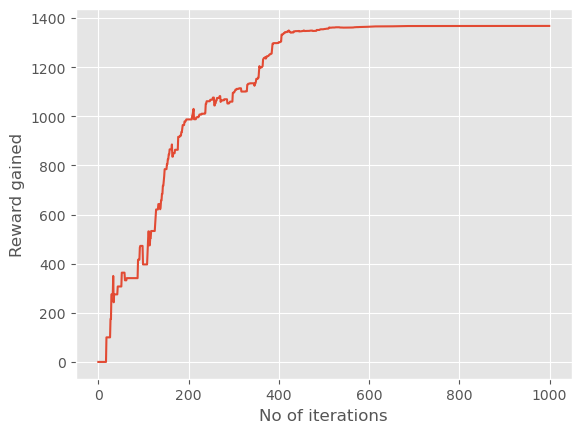

In [24]:
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
    
print("Most efficient path: ")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

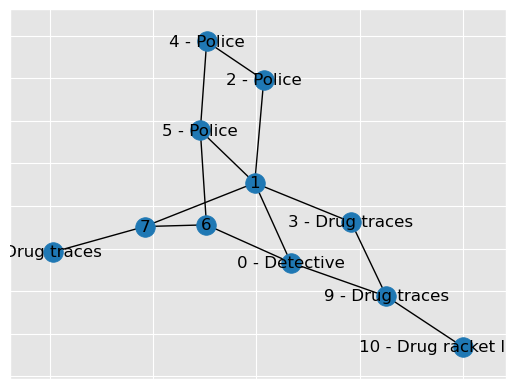

In [26]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]
G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective' , 1:'1' , 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}
H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size=[200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [27]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state=1

In [28]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action


In [29]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action


In [30]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
         found.append('d')
    return (found)
available_action = available_actions(initial_state)
action = sample_next_action(available_action)

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3340524870.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))


In [33]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
         max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    enviroment = collect_environmental_data(action)
    if 'p' in enviroment:
        env_police[current_state, action] += 1
    if 'd' in enviroment:
        env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return (np.sum(Q / np.max(Q) * 100))
    else:
        return (0)
update(initial_state, action, gamma)


C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3427091589.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))


0

In [34]:
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0) [1]
    env_pos_row = env_matrix_snap[state, av_action]
    if (np.sum(env_pos_row < 0)):
        temp_av_action = av_action [np.array(env_pos_row)[0]>= 0]
        if len (temp_av_action) > 0:
            av_action = temp_av_action
    return av_action

In [35]:
scores = []
for i in range(1000):
    current_state =np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)


C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3340524870.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3427091589.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3427091589.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


In [36]:
print('Police Found')
print(env_police)
print('')
print('Drug trace Found')
print(env_drugs)


Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 22.  0.  0. 20.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 44.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 39.  0.  0. 51.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 38.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug trace Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 37.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 46.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 33.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 28.  0.  0.  0

In [37]:
import gym
env = gym.make("Taxi-v3").env
env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [38]:
env.reset()
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [39]:
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state
env.render()


State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [40]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [41]:
import numpy as np
import gym

In [42]:
env = gym.make('FrozenLake-v1')


In [43]:
epsilon = 0.9
total_episodes = 1000
max_steps = 100
alpha = 0.85
gamma = 0.95
Q = np.zeros((env.observation_space.n, env.action_space.n))


In [44]:
def choose_action(state):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

In [46]:
reward = 0
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    while t < max_steps:
        env.render()
        state2, reward, done, info = env.step(action1)
        action2 = choose_action(state2)
        update(state1, state2, reward, action1, action2)
        state1 = state2
        action1 = action2
        t += 1
        reward += 1
        if done:
            break



SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH


In [47]:
print("Performance : ", reward/total_episodes)
print(Q)


Performance :  0.001
[[8.60639466e-03 2.28628846e-03 1.10536180e-03 1.48750267e-03]
 [4.25986016e-03 4.64353966e-04 1.62684112e-03 2.08647778e-04]
 [5.97795329e-04 4.38002003e-03 8.66707391e-05 2.09616447e-04]
 [1.00383467e-05 1.79614455e-05 3.93489166e-04 4.61916228e-04]
 [2.78286803e-03 1.84956429e-03 1.94638815e-03 5.83757482e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.57976908e-01 2.32133157e-05 6.75794460e-04 1.73460393e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.37676356e-02 8.10231453e-02 3.08764992e-03 3.12805854e-03]
 [1.81751662e-01 8.21053942e-02 3.60159413e-02 6.06809142e-03]
 [2.94235455e-02 1.53535660e-01 1.19664260e-01 3.70942862e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.84586961e-01 1.27111814e-01 1.37153556e-01 3.10302802e-02]
 [5.50682044e-01 2.01827406e-01 9.17882281e-01 1.48137152e-01]
 [0.00000000e+00 0.00000000e+00 0.

In [48]:
env = gym.make('FrozenLake8x8-v1')


In [49]:
print("Number of States:", env.nS)


Number of States: 64


In [50]:
epsilon = 0.9
total_episodes = 2
max_steps = 100
alpha = 0.85
gamma = 0.95
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [51]:
reward = 0
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    while t < max_steps:
        # Visualizing the training
        env.render()
        # Getting the next state
        state2, reward, done, info = env.step(action1)
        # Choosing the next action
        action2 = choose_action(state2)
        # Learning the Q-value
        update(state1, state2, reward, action1, action2)
        state1 = state2
        action1 = action2
        # Updating the respective values
        t += 1
        reward += 1
        # If at the end of learning process
        if done:
            break



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
F

In [52]:
# Evaluating the performance
print("Performance : ", reward/total_episodes)
# Visualizing the Q-matrix
print(Q)


Performance :  0.5
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Lingkungan (Environments), Gym menyajikan beragam lingkungan untuk menggambarkan berbagai tugas atau masalah. Ini meliputi permainan, kontrol, simulasi fisika, dan lainnya. Lingkungan ini membantu peneliti dan pengembang menguji kinerja algoritma mereka dalam konteks yang berbeda.
    
    - Ruang (Spaces), Ruang menggambarkan keadaan dan tindakan yang mungkin dalam suatu lingkungan. Ada dua jenis: ruang keadaan (state space) mencakup semua kemungkinan keadaan lingkungan, sementara ruang tindakan (action space) mencakup semua tindakan yang dapat diambil oleh agen.
    
    - Aksi (Actions), Agen dalam Gym OpenAI melakukan tindakan untuk berinteraksi dengan lingkungan, yang bervariasi tergantung pada jenis lingkungan, seperti memilih langkah dalam permainan atau mengontrol robot.
    
    - Reward System, Setiap interaksi antara agen dan lingkungan memberikan reward. Tujuan umum agen adalah memaksimalkan jumlah reward yang diterima seiring waktu.
    
    - Episode, Interaksi antara agen dan lingkungan teratur dalam episode, yang terdiri dari urutan keadaan, tindakan, dan reward. Episode dimulai dari keadaan awal dan berlanjut sampai kondisi berakhir atau mencapai tujuan tertentu.
---

In [3]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-11-23 13:53:09.639572


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [53]:
!jupyter nbconvert --to html "./ IF540L_Kelas_EL_laporan_M12_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./ IF540L_Kelas_EL_laporan_M12_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 1355266 bytes to  IF540L_Kelas_EL_laporan_M12_00000060236_Nisaul Fadhilah.html
